In [1]:
import csv
import gensim.models.keyedvectors as kv

from sklearn import cluster
import numpy as np

import nltk
from nltk.corpus import stopwords

model = kv.KeyedVectors.load_word2vec_format("google-vectors.w2v",binary=True)

In [2]:
# create vocab list
vocab = list(model.vocab)

In [3]:
rows=list()
# open Harvard Inquirer
with open('lexicons/Harvard_Inquirer-inqtabs.txt', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(reader):
        if i == 0:
            header = row
        else:
            rows.append(row)

In [4]:
# extract words of interest
categories = ["Pleasur","Pain","Feel","Arousal","Relig","Exprsv","Polit@"]
inquirer = dict()
for c in categories:
    
    # extract index from header
    idx = header.index(c)
    
    # extract words and drop to lowercase
    inquirer[c] = [w[0].lower() for w in rows if w[idx] != '']
    
    # remove alternate meanings and reduce duplicates
    inquirer[c] = list(set([w.split("#")[0] for w in inquirer[c]]))

In [5]:
# category stability calculates mean distance from the center
# where the center of the group is calculated using kMeans
# clustering with a single cluster.

def get_category_stability_kmeans(vectors):
    kmeans = cluster.KMeans(n_clusters=1)
    fitted = kmeans.fit_transform(vectors)
    centroids = kmeans.cluster_centers_
    fitted_dist = kmeans.transform(vectors)**2
    return(np.mean(fitted_dist))

In [6]:
# run some sanity checks first.
# stopword category
print("Starting stopwords")
sw = [w for w in stopwords.words('english')]
cc = len(sw)
mv = [w for w in vocab if w in sw]
vc = len(mv)
print(" vocab found {0}%".format(round(vc/cc*100,2)))
vectors = model[mv]
vcs = get_category_stability_kmeans(vectors)
print(" category stability: {0}".format(vcs))

# a junk term category
terms = ["one","the","inside","president","yellow","loud","winter","pain","pleasure"]
vectors = model[terms]
print("Starting junk terms")
vcs = get_category_stability_kmeans(vectors)
print(" category stability: {0}".format(vcs))

Starting stopwords
 vocab found 100.0%
 category stability: 299.58984375
Starting junk terms
 category stability: 365.0558776855469


In [7]:
labels=list()
data=list()
for category in inquirer.keys():
    print("Starting category:",category)
    labels.append(category)
    cc = len(inquirer[category])
    mv = [w for w in vocab if w in inquirer[category]]
    vc = len(mv)
    print(" vocab found {0}%".format(round(vc/cc*100,2)))
    vectors = model[mv]
    vcs = get_category_stability_kmeans(vectors)
    data.append(vcs)
    print(" category stability: {0}".format(vcs))

Starting category: Arousal
 vocab found 88.28%
 category stability: 252.06033325195312
Starting category: Relig
 vocab found 100.0%
 category stability: 392.3981628417969
Starting category: Pleasur
 vocab found 84.77%
 category stability: 226.98109436035156
Starting category: Feel
 vocab found 77.55%
 category stability: 124.57455444335938
Starting category: Polit@
 vocab found 98.34%
 category stability: 447.9237060546875
Starting category: Pain
 vocab found 80.09%
 category stability: 175.10206604003906
Starting category: Exprsv
 vocab found 98.94%
 category stability: 429.0830078125


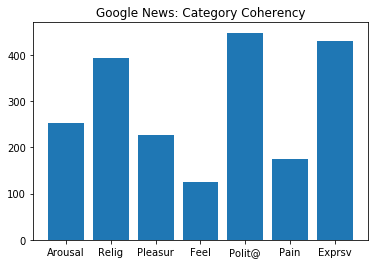

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.title("Google News: Category Coherency")
plt.bar(labels,data)
plt.show()

In [9]:
# now run through for smaller poems vector set
import bz2
model = kv.KeyedVectors.load_word2vec_format(bz2.open("poems.w2v.bz2"))

Starting category: Arousal
 vocab found 96.55%
 category stability: 1397.0972900390625
Starting category: Relig
 vocab found 98.95%
 category stability: 1768.0919189453125
Starting category: Pleasur
 vocab found 96.69%
 category stability: 1487.5635986328125
Starting category: Feel
 vocab found 93.88%
 category stability: 878.1744384765625
Starting category: Polit@
 vocab found 97.51%
 category stability: 1229.2825927734375
Starting category: Pain
 vocab found 96.83%
 category stability: 1221.5709228515625
Starting category: Exprsv
 vocab found 97.34%
 category stability: 1704.7332763671875


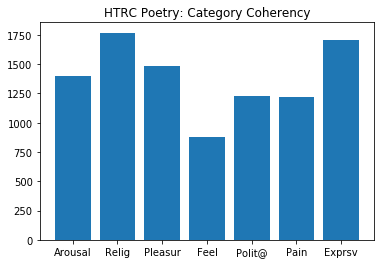

In [10]:
# create vocab list
vocab = list(model.vocab)

labels=list()
data=list()
for category in inquirer.keys():
    print("Starting category:",category)
    labels.append(category)
    cc = len(inquirer[category])
    mv = [w for w in vocab if w in inquirer[category]]
    vc = len(mv)
    print(" vocab found {0}%".format(round(vc/cc*100,2)))
    vectors = model[mv]
    vcs = get_category_stability_kmeans(vectors)
    data.append(vcs)
    print(" category stability: {0}".format(vcs))

from matplotlib import pyplot as plt
%matplotlib inline
plt.title("HTRC Poetry: Category Coherency")
plt.bar(labels,data)
plt.show()